In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:

# Download NLTK resources (uncomment if not already downloaded)
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Godswill
[nltk_data]     Otto\AppData\Roaming\nltk_data...


True

In [3]:
# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define custom stop words list
custom_stop_words = set(stopwords.words('english'))

In [4]:

# Function to preprocess text
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stop words and non-alphabetic tokens
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in custom_stop_words]
    
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

In [22]:
# Function to preprocess text using stemming
def preprocess_text_stemming(text):
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stop words and non-alphabetic tokens
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in custom_stop_words]
    
    # Stem tokens
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text


In [13]:
articles_df = pd.read_csv('..\data\processed_article.csv')

In [16]:
# Combine title and article text into a single column
articles_df['text'] = articles_df['clean_title'] + ' ' + articles_df['clean_article']

In [15]:
articles_df

,Unnamed: 0,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,...,category,article,title_sentiment,website,Domain,clean_article,clean_title,article_word_count,title_word_count,author_count
0,0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,...,Monaco,"pavyllon london, at four seasons hotel london ...",Neutral,forbes.com,forbes.com,"pavyllon london, at four seasons hotel london ...",superstar chef yannick alléno brings refined f...,945,11,3
1,1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,...,Monaco,nice moved into provisional first place in the...,Positive,channelnewsasia.com,channelnewsasia.com,nice moved into provisional first place in the...,nice claim top spot in ligue 1 with late win a...,132,12,1
2,2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,...,Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative,time.com,time.com,"the world’s frogs, salamanders, newts and othe...",amphibians are the world’s most vulnerable spe...,421,11,1
3,3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral,phys.org,phys.org,iron-rich sediment colors the red-orange water...,image: rusty red waters in madagascar,310,6,1
4,4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,...,Madagascar,"everything ends. no, i’m not having an existen...",Neutral,digitaltrends.com,digitaltrends.com,"everything ends. no, i’m not having an existen...",everything leaving max (formerly hbo max) in n...,636,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58351,58351,781108,NaN,The Indian Express,PTI,"Have done no wrong, only did party work, says ...",The High Court today allowed Shivakumar to wit...,https://indianexpress.com/article/cities/banga...,https://images.indianexpress.com/2023/11/DK-Sh...,2023-11-29 10:57:22,...,Home,Karnataka Deputy Chief Minister D K Shivakumar...,Neutral,indianexpress.com,indianexpress.com,Karnataka Deputy Chief Minister D K Shivakumar...,"Have done no wrong, only did party work, says ...",463,16,1
58352,58352,781129,NaN,Forbes,"Tom Sanderson, Senior Contributor, \n Tom Sand...",FC Barcelona Guarantees $77.6 Million Champion...,FC Barcelona have guaranteed at least $77.6 mi...,https://www.forbes.com/sites/tomsanderson/2023...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 08:41:18,...,Home,FC Barcelona have guaranteed at least $767.6 m...,Neutral,forbes.com,forbes.com,FC Barcelona have guaranteed at least $767.6 m...,FC Barcelona Guarantees $77.6 Million Champion...,387,12,3
58353,58353,781235,NaN,NPR,Brigid McCarthy,Three hospitals ignored her gravely ill fiancé...,"Forty years ago, Sarah Lubarsky came home from...",https://www.npr.org/2023/11/29/1215016001/heal...,https://media.npr.org/assets/img/2023/11/23/sa...,2023-11-29 10:01:12,...,Home,The photo from David and Sarah Lubarsky's wedd...,Neg

In [28]:
# Preprocess text in 'text' column
# articles_df['preprocessed_text'] = articles_df['text'].apply(preprocess_text)

In [20]:
from nltk.stem import PorterStemmer

# Initialize Porter Stemmer
stemmer = PorterStemmer()

In [23]:
# Preprocess text in 'text' column using stemming
articles_df['preprocessed_text_stemming'] = articles_df['text'].apply(preprocess_text_stemming)


In [26]:

# Initialize TF-IDF vectorizer with preprocessed text
tfidf_vectorizer_stemming = TfidfVectorizer(max_features=1000)


In [27]:

# Fit and transform preprocessed text data to compute TF-IDF scores
tfidf_matrix_stemming = tfidf_vectorizer_stemming.fit_transform(articles_df['preprocessed_text_stemming'])

In [29]:

# Get feature names (words) from the TF-IDF vectorizer
feature_names_stemming = tfidf_vectorizer_stemming.get_feature_names_out()

# Get TF-IDF scores for each article
tfidf_scores_stemming = tfidf_matrix_stemming.toarray()


In [30]:
# Find the top N keywords for each article
top_keywords_per_article_stemming = []
for i, row in enumerate(tfidf_scores_stemming):
    top_keyword_indices = row.argsort()[-5:][::-1]  # Change 5 to the desired number of keywords
    top_keywords = [feature_names_stemming[idx] for idx in top_keyword_indices]
    top_keywords_per_article_stemming.append(top_keywords)


In [31]:
# Add top keywords to DataFrame
articles_df['top_keywords_stemming'] = top_keywords_per_article_stemming



                                                   title  \
0      superstar chef yannick alléno brings refined f...   
1      nice claim top spot in ligue 1 with late win a...   
2      amphibians are the world’s most vulnerable spe...   
3                  image: rusty red waters in madagascar   
4      everything leaving max (formerly hbo max) in n...   
...                                                  ...   
58351  Have done no wrong, only did party work, says ...   
58352  FC Barcelona Guarantees $77.6 Million Champion...   
58353  Three hospitals ignored her gravely ill fiancé...   
58354  Kerber’s Farm: Bringing Farm To Table To Manha...   
58355  Tips For Investing In Short-Term Rentals In Dubai   

                             top_keywords_stemming  
0             [season, star, four, action, design]  
1                 [point, win, five, first, place]  
2          [studi, climat, chang, univers, involv]  
3           [water, purpos, river, imag, reproduc]  
4           [s

In [32]:
# Display the DataFrame with top keywords after stemming

(articles_df[['title', 'top_keywords_stemming']])


,title,top_keywords_stemming
0,superstar chef yannick alléno brings refined f...,"[season, star, four, action, design]"
1,nice claim top spot in ligue 1 with late win a...,"[point, win, five, first, place]"
2,amphibians are the world’s most vulnerable spe...,"[studi, climat, chang, univers, involv]"
3,image: rusty red waters in madagascar,"[water, purpos, river, imag, reproduc]"
4,everything leaving max (formerly hbo max) in n...,"[season, novemb, street, origin, leav]"
...,...,...
58351,"Have done no wrong, only did party work, says ...","[court, case, govern, investig, parti]"
58352,FC Barcelona Guarantees $77.6 Million Champion...,"[million, win, group, goal, could]"
58353,Three hospitals ignored her gravely ill fiancé...,"[hospit, said, young, happen, go]"
58354,Kerber’s Farm: Bringing Farm To Table To Manha...,"[west, long, say, peopl, bring]"


## LDA

In [33]:
from sklearn.decomposition import LatentDirichletAllocation

In [46]:
# Initialize LDA model
lda_model = LatentDirichletAllocation(n_components=20, random_state=42)  


In [47]:
# Fit LDA model to TF-IDF matrix
lda_model.fit(tfidf_matrix_stemming)

LatentDirichletAllocation(n_components=20, random_state=42)

In [48]:
# Get the topics and their top words
topics = lda_model.components_
feature_names_lda = tfidf_vectorizer_stemming.get_feature_names_out()
n_top_words = 5  # Number of top words for each topic


In [49]:
# Print top words for each topic
for topic_idx, topic in enumerate(topics):
    top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names_lda[i] for i in top_words_idx]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")


Topic 1: court, said, case, charg, alleg
Topic 2: music, etf, beyond, factor, book
Topic 3: statement, compani, inform, class, result
Topic 4: stock, trade, averag, ratio, share
Topic 5: elect, parti, vote, said, congress
Topic 6: india, news, view, econom, time
Topic 7: compani, financi, inform, million, incom
Topic 8: worker, said, car, vehicl, electr
Topic 9: min, stock, read, upsid, rs
Topic 10: said, polic, peopl, kill, arrest
Topic 11: ukrain, russia, russian, china, said
Topic 12: climat, studi, said, research, energi
Topic 13: stock, share, quarter, compani, rate
Topic 14: gaza, israel, isra, hama, palestinian
Topic 15: ai, user, googl, technolog, compani
Topic 16: film, like, one, make, time
Topic 17: inflat, year, rate, price, said
Topic 18: stock, compani, compar, earn, servic
Topic 19: cup, game, world, team, match
Topic 20: market, global, industri, forecast, growth


In [50]:
# Assign topics to articles based on the topic with the highest probability
article_topics = lda_model.transform(tfidf_matrix_stemming)
articles_df['topic'] = article_topics.argmax(axis=1)



In [51]:
# Display the DataFrame with assigned topics
(articles_df[['title', 'topic']])

,title,topic
0,superstar chef yannick alléno brings refined f...,15
1,nice claim top spot in ligue 1 with late win a...,18
2,amphibians are the world’s most vulnerable spe...,11
3,image: rusty red waters in madagascar,11
4,everything leaving max (formerly hbo max) in n...,15
...,...,...
58351,"Have done no wrong, only did party work, says ...",0
58352,FC Barcelona Guarantees $77.6 Million Champion...,18
58353,Three hospitals ignored her gravely ill fiancé...,15
58354,Kerber’s Farm: Bringing Farm To Table To Manha...,15


## Website against topics

In [52]:
# Group articles by website and topic
website_topic_distribution = articles_df.groupby(['Domain', 'topic']).size().unstack(fill_value=0)

# Display the DataFrame with the distribution of topics across different websites
print("Distribution of topics across different websites:")
# print(website_topic_distribution)


Distribution of topics across different websites:
topic                              0     2     3    4     5    6    7     8   \
Domain                                                                         
abcnews.go.com                    219     0     0  310     0    4  108     0   
aljazeera.com                      55     0     0  140     0    0   14     0   
allafrica.com                       2     0     0    0     0    0    0     0   
androidcentral.com                  0     0     0    0     0    0    1     0   
bbc.co.uk                         200     0     0  215     0    0   83     0   
bbc.com                             6     0     0    5     0    0    6     0   
boingboing.net                     49     0     0   69     1    0   20     0   
businessinsider.com               199     0     0  159     2    0  248     0   
channelnewsasia.com                51     0     0    9     5    3   17     0   
cnalifestyle.channelnewsasia.com    1     0     0    0     0    0    1

In [53]:
(website_topic_distribution)

topic,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Domain,,,,,,,,,,,,,,,,,,,
abcnews.go.com,219,0,0,310,0,4,108,0,505,258,141,2,179,41,134,83,0,73,1
aljazeera.com,55,0,0,140,0,0,14,0,246,199,37,0,745,12,34,14,0,168,0
allafrica.com,2,0,0,0,0,0,0,0,9,0,6,0,0,0,1,0,0,2,0
androidcentral.com,0,0,0,0,0,0,1,0,0,0,0,0,0,187,331,2,0,1,0
bbc.co.uk,200,0,0,215,0,0,83,0,665,101,137,0,194,38,294,38,0,67,0
bbc.com,6,0,0,5,0,0,6,0,27,2,7,0,2,4,10,8,0,4,0
boingboing.net,49,0,0,69,1,0,20,0,76,4,34,0,9,52,382,5,0,12,0
businessinsider.com,199,0,0,159,2,0,248,0,103,230,79,0,221,247,410,131,0,5,0
channelnewsasia.com,51,0,0,9,5,3,17,0,53,65,36,0,37,11,9,106,0,250,0


In [55]:
# Define a custom function to calculate the number of unique topics covered
def count_unique_topics(topic_list):
    return len(set(topic_list))

# Group articles by website and aggregate unique topics covered using the custom function
website_unique_topics = articles_df.groupby('Domain')['topic'].agg(count_unique_topics)

# Sort websites by the number of unique topics covered
most_diverse_websites = website_unique_topics.sort_values(ascending=False)

# Display the most diverse websites and the number of unique topics covered
print("Most diverse websites and the number of unique topics covered:")
(most_diverse_websites)


Most diverse websites and the number of unique topics covered:


Domain
globenewswire.com                   18
marketscreener.com                  17
timesofindia.indiatimes.com         16
punchng.com                         16
npr.org                             16
forbes.com                          16
economictimes.indiatimes.com        15
rt.com                              15
indianexpress.com                   15
globalsecurity.org                  15
abcnews.go.com                      14
ibtimes.com                         14
deadline.com                        14
readwrite.com                       13
euronews.com                        13
channelnewsasia.com                 13
boingboing.net                      12
time.com                            12
phys.org                            12
businessinsider.com                 12
wired.com                           12
cnn.com                             12
gizmodo.com                         12
aljazeera.com                       11
bbc.com                             11
bbc.co.uk         

In [56]:
import matplotlib.pyplot as plt

# Group articles by publication date and topic
topic_trends = articles_df.groupby(['published_at', 'topic']).size().unstack(fill_value=0)

# Plot topic trends

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


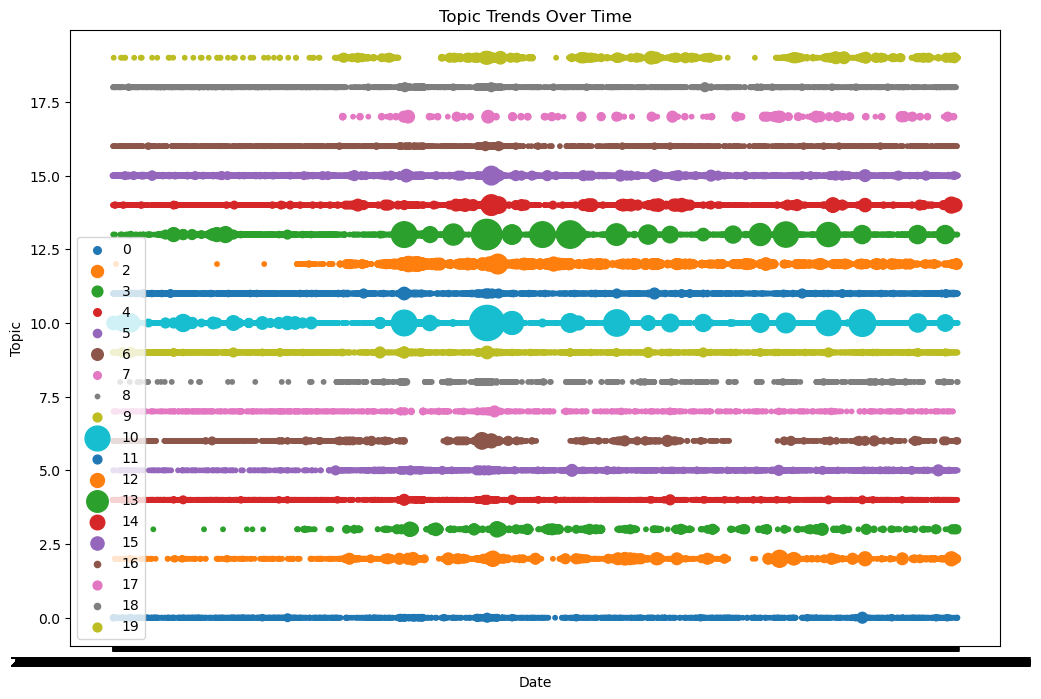

In [57]:

plt.figure(figsize=(12, 8))
for topic in topic_trends.columns:
    plt.scatter(topic_trends.index, [topic]*len(topic_trends), s=topic_trends[topic]*10, label=topic)

plt.xlabel('Date')
plt.ylabel('Topic')
plt.title('Topic Trends Over Time')
plt.legend()
plt.show()


In [58]:
from sklearn.cluster import KMeans



In [59]:
# Initialize KMeans clustering model
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust number of clusters as needed

In [60]:
# Fit KMeans model to TF-IDF matrix
kmeans.fit(tfidf_matrix_stemming)


KMeans(n_clusters=5, random_state=42)

In [63]:
# Get cluster labels
cluster_labels = kmeans.labels_
cluster_labels

array([1, 1, 1, ..., 1, 1, 4])

In [62]:
# Add cluster labels to DataFrame
articles_df['cluster'] = cluster_labels




Cluster analysis:
topic      0     2    3     4     5     6    7     8     9     10    11  \
cluster                                                                   
0          11     1    0    55    40     1    1     0    60   102     7   
1        1701    95   20  2450   146   188  883    10  3178  3788  3121   
2           1     0  954     0     0     1    0     0     0     0     0   
3          11     0    2    56  3048     2    7  1423     7    35    28   
4          11  1500  987     0     9  1292   31     2     0    11   214   

topic       12    13    14    15   16   17    18    19  
cluster                                                 
0            0  2983     5    42    9    0     6     0  
1            8   355  2332  5363  927    2  1888    18  
2        14254     0     0     0    0   17     0     0  
3            1     1    45    46  105    0   125     2  
4           56     0  1210     7  335  465     4  2255  


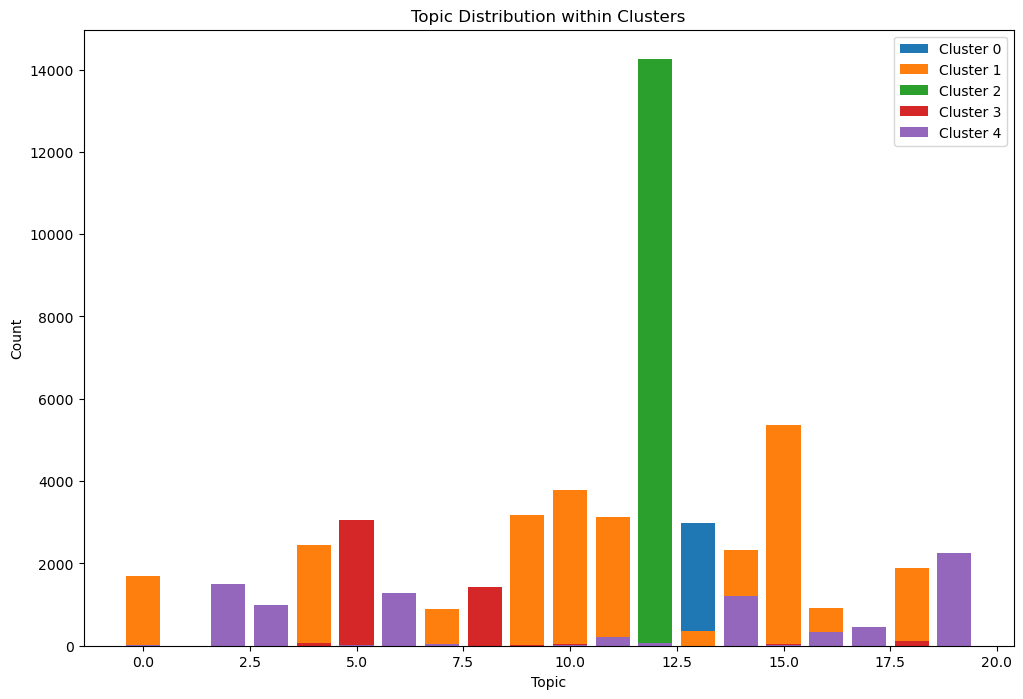

In [64]:
# Analyze clusters to identify events
cluster_analysis = articles_df.groupby('cluster')['topic'].value_counts().unstack(fill_value=0)

# Display cluster analysis
print("Cluster analysis:")
print(cluster_analysis)

# Plot topic distribution within each cluster
plt.figure(figsize=(12, 8))
for cluster in cluster_analysis.index:
    plt.bar(cluster_analysis.columns, cluster_analysis.loc[cluster], label=f'Cluster {cluster}')

plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Topic Distribution within Clusters')
plt.legend()
plt.show()


In [65]:
## Next is to manually look into each clusters/....

--- to be continued

In [74]:
# articles_df.to_csv('..\data\Mled.csv')

In [68]:
articles_df.head()

,Unnamed: 0,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,...,clean_article,clean_title,article_word_count,title_word_count,author_count,text,preprocessed_text_stemming,top_keywords_stemming,topic,cluster
0,0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,...,"pavyllon london, at four seasons hotel london ...",superstar chef yannick alléno brings refined f...,945,11,3,superstar chef yannick alléno brings refined f...,superstar chef yannick alléno bring refin fren...,"[season, star, four, action, design]",15,1
1,1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,...,nice moved into provisional first place in the...,nice claim top spot in ligue 1 with late win a...,132,12,1,nice claim top spot in ligue 1 with late win a...,nice claim top spot ligu late win clermont nic...,"[point, win, five, first, place]",18,1
2,2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,...,"the world’s frogs, salamanders, newts and othe...",amphibians are the world’s most vulnerable spe...,421,11,1,amphibians are the world’s most vulnerable spe...,amphibian world vulner speci threat increas wo...,"[studi, climat, chang, univers, involv]",11,1
3,3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,...,iron-rich sediment colors the red-orange water...,image: rusty red waters in madagascar,310,6,1,image: rusty red waters in madagascar iron-ric...,imag rusti red water madagascar sediment color...,"[water, purpos, river, imag, reproduc]",11,1
4,4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,...,"everything ends. no, i’m not having an existen...",everything leaving max (formerly hbo max) in n...,636,9,1,everything leaving max (formerly hbo max) in n...,everyth leav max formerli hbo max novemb every...,"[season, novemb, street, origin, leav]",15,1


In [70]:
articles_df.columns

Index(['Unnamed: 0', 'article_id', 'source_id', 'source_name', 'author',
       'title', 'description', 'url', 'url_to_image', 'published_at',
       'content', 'category', 'article', 'title_sentiment', 'website',
       'Domain', 'clean_article', 'clean_title', 'article_word_count',
       'title_word_count', 'author_count', 'text',
       'preprocessed_text_stemming', 'top_keywords_stemming', 'topic',
       'cluster'],
      dtype='object')

In [75]:
articles_df[['article_id','Domain','published_at','category','title_sentiment', 'article_word_count',
       'title_word_count', 'author_count', 'topic',
       'cluster']].to_csv('..\data\ML_features.csv',index=False)

In [73]:
articles_df[['article_id','Domain','published_at','category','title_sentiment', 'article_word_count',
       'title_word_count', 'author_count', 'topic',
       'cluster']]

,article_id,Domain,published_at,category,title_sentiment,article_word_count,title_word_count,author_count,topic,cluster
0,81664,forbes.com,2023-11-01 03:27:21.000000,Monaco,Neutral,945,11,3,15,1
1,81667,channelnewsasia.com,2023-10-27 21:28:48.000000,Monaco,Positive,132,12,1,18,1
2,81694,time.com,2023-10-04 17:36:18.000000,Madagascar,Negative,421,11,1,11,1
3,81695,phys.org,2023-10-31 18:04:02.000000,Madagascar,Neutral,310,6,1,11,1
4,81703,digitaltrends.com,2023-10-23 23:09:18.000000,Madagascar,Neutral,636,9,1,15,1
...,...,...,...,...,...,...,...,...,...,...
58351,781108,indianexpress.com,2023-11-29 10:57:22,Home,Neutral,463,16,1,0,1
58352,781129,forbes.com,2023-11-29 08:41:18,Home,Neutral,387,12,3,18,1
58353,781235,npr.org,2023-11-29 10:01:12,Home,Negative,595,13,1,15,1
58354,781240,forbes.com,2023-11-29 13:44:33,Home,Neutral,803,10,3,15,1
